In [4]:
import glob

import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import load_files
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import homogeneity_score

In [5]:
spark = SparkSession.builder.appName("Python Spark miniBatchKMeans").getOrCreate()

In [7]:
random_state = 0
files = glob.glob("csv_data/*.csv")

csv_data/pubmed21n0253/
[0]
  (0, 35)	1.0
  (1, 119)	0.26685330057525936
  (1, 107)	0.2350101465990454
  (1, 74)	0.26685330057525936
  (1, 73)	0.26685330057525936
  (1, 72)	0.26685330057525936
  (1, 56)	0.26685330057525936
  (1, 51)	0.26685330057525936
  (1, 47)	0.26685330057525936
  (1, 39)	0.21241706930067863
  (1, 33)	0.21241706930067863
  (1, 27)	0.26685330057525936
  (1, 26)	0.26685330057525936
  (1, 2)	0.26685330057525936
  (1, 1)	0.26685330057525936
  (1, 0)	0.26685330057525936
  (2, 118)	0.35353503050905216
  (2, 116)	0.46702243799528237
  (2, 113)	0.15567414599842744
  (2, 111)	0.35353503050905216
  (2, 109)	0.17676751525452608
  (2, 101)	0.17676751525452608
  (2, 95)	0.17676751525452608
  (2, 93)	0.17676751525452608
  (2, 52)	0.15567414599842744
  :	:
  (13, 29)	0.1417679400321822
  (13, 28)	0.12485101101686247
  (13, 24)	0.2835358800643644
  (13, 23)	0.1417679400321822
  (13, 16)	0.1417679400321822
  (13, 14)	0.1417679400321822
  (13, 12)	0.1417679400321822
  (13, 9)	0.42530

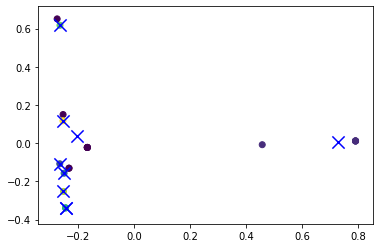

1.0
[0 1]
  (0, 132)	0.86498107270578
  (0, 42)	0.5018044876849533
  (1, 144)	0.2553040699734118
  (1, 143)	0.2553040699734118
  (1, 135)	0.2553040699734118
  (1, 129)	0.2553040699734118
  (1, 123)	0.2553040699734118
  (1, 113)	0.2553040699734118
  (1, 112)	0.2553040699734118
  (1, 102)	0.2553040699734118
  (1, 85)	0.2553040699734118
  (1, 79)	0.2553040699734118
  (1, 47)	0.2091382867508451
  (1, 44)	0.2553040699734118
  (1, 39)	0.2091382867508451
  (1, 38)	0.2553040699734118
  (1, 22)	0.2553040699734118
  (1, 5)	0.2553040699734118
  (2, 154)	0.17842862996523665
  (2, 153)	0.17842862996523665
  (2, 145)	0.31911003469417015
  (2, 142)	0.31911003469417015
  (2, 139)	0.17842862996523665
  (2, 125)	0.17842862996523665
  (2, 121)	0.17842862996523665
  :	:
  (20, 21)	0.3627555425015376
  (20, 15)	0.3627555425015376
  (21, 90)	0.4564528148683627
  (21, 82)	0.4564528148683627
  (21, 73)	0.4564528148683627
  (21, 61)	0.4564528148683627
  (21, 24)	0.40817068879941976
  (23, 108)	0.57735026918962

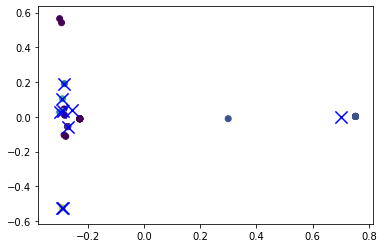

0.238070871203829
[0 2 1]
  (0, 71)	1.0
  (1, 71)	1.0
  (3, 224)	0.2394155585741946
  (3, 173)	0.2394155585741946
  (3, 171)	0.2394155585741946
  (3, 169)	0.2394155585741946
  (3, 151)	0.2394155585741946
  (3, 128)	0.2394155585741946
  (3, 126)	0.2394155585741946
  (3, 125)	0.21618113908564102
  (3, 112)	0.21618113908564102
  (3, 102)	0.21618113908564102
  (3, 101)	0.2394155585741946
  (3, 93)	0.2394155585741946
  (3, 86)	0.2394155585741946
  (3, 85)	0.2394155585741946
  (3, 73)	0.2394155585741946
  (3, 51)	0.2394155585741946
  (3, 49)	0.2394155585741946
  (3, 4)	0.2394155585741946
  (4, 215)	0.3015113445777636
  (4, 196)	0.3015113445777636
  (4, 184)	0.3015113445777636
  (4, 174)	0.3015113445777636
  (4, 170)	0.3015113445777636
  :	:
  (43, 64)	0.24024049168004777
  (43, 59)	0.24024049168004777
  (43, 52)	0.2003841312246603
  (43, 37)	0.24024049168004777
  (43, 30)	0.24024049168004777
  (43, 12)	0.24024049168004777
  (44, 227)	0.23897032299752138
  (44, 226)	0.23897032299752138
  (44,

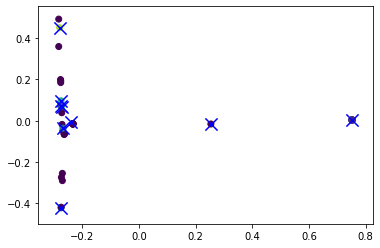

0.1463455255565192
[3 2 1 0]
  (0, 88)	1.0
  (1, 88)	1.0
  (2, 282)	0.25881145059016375
  (2, 281)	0.25881145059016375
  (2, 266)	0.25881145059016375
  (2, 257)	0.25881145059016375
  (2, 247)	0.25881145059016375
  (2, 221)	0.25881145059016375
  (2, 220)	0.25881145059016375
  (2, 198)	0.25881145059016375
  (2, 164)	0.25881145059016375
  (2, 153)	0.20005822363378367
  (2, 102)	0.20005822363378367
  (2, 98)	0.25881145059016375
  (2, 82)	0.22174229158504696
  (2, 81)	0.25881145059016375
  (2, 48)	0.25881145059016375
  (2, 15)	0.25881145059016375
  (3, 296)	0.12411252088456032
  (3, 295)	0.1800806929884338
  (3, 283)	0.329985889687445
  (3, 275)	0.329985889687445
  (3, 272)	0.1800806929884338
  (3, 250)	0.1800806929884338
  (3, 241)	0.14598463018698937
  :	:
  (86, 77)	0.36398870622950935
  (87, 293)	0.2567012760502816
  (87, 252)	0.2567012760502816
  (87, 242)	0.2567012760502816
  (87, 240)	0.20809804888487143
  (87, 169)	0.23519400540843982
  (87, 131)	0.5134025521005632
  (87, 128)	0.256

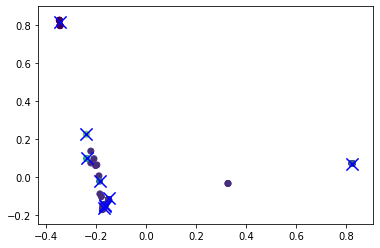

0.12563705842699843
[2 0 1 3 4]
  (1, 2228)	1.0
  (2, 9484)	0.2198491905334256
  (2, 8502)	0.2750903968594203
  (2, 5396)	0.2996646796134808
  (2, 5237)	0.23067594596783383
  (2, 5137)	0.2671792448291823
  (2, 4032)	0.2852896457202368
  (2, 3920)	0.2996646796134808
  (2, 3444)	0.2996646796134808
  (2, 2733)	0.16800668178241251
  (2, 2066)	0.25051611410535984
  (2, 1824)	0.26071536296617637
  (2, 1783)	0.18773892534386297
  (2, 99)	0.2750903968594203
  (2, 94)	0.26071536296617637
  (2, 72)	0.25051611410535984
  (3, 9458)	0.3917352312956142
  (3, 9184)	0.5394159250595887
  (3, 8945)	0.15077501820467945
  (3, 8804)	0.3049846461289049
  (3, 8602)	0.09644475148334691
  (3, 8028)	0.18647176820539987
  (3, 7653)	0.1958676156478071
  (3, 7314)	0.17463440036634675
  (3, 3953)	0.1295418029232191
  :	:
  (3443, 3238)	0.3445868080448781
  (3443, 2863)	0.3445868080448781
  (3443, 1960)	0.43073688525480774
  (3444, 9519)	0.28343324691928923
  (3444, 8051)	0.24473737607980314
  (3444, 7763)	0.2488859

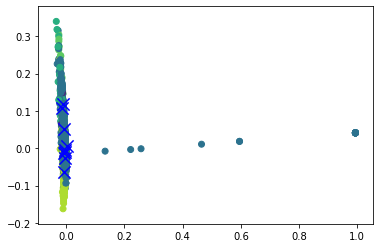

0.022868478168854116
[2 3 0 4 5 1]
  (0, 24512)	0.14571323654294982
  (0, 24408)	0.2945916841350718
  (0, 22540)	0.2945916841350718
  (0, 21969)	0.2727950996962906
  (0, 21151)	0.14909400364893602
  (0, 18966)	0.2945916841350718
  (0, 18962)	0.24800140809146398
  (0, 15977)	0.2343124725175878
  (0, 12701)	0.2697979925302452
  (0, 11661)	0.19312091491048378
  (0, 7335)	0.19287233002481588
  (0, 7129)	0.25610905695636904
  (0, 5518)	0.2761082479575216
  (0, 5416)	0.22620482365268277
  (0, 3452)	0.279812032599719
  (0, 1228)	0.2945916841350718
  (1, 25946)	0.1565749851205197
  (1, 25943)	0.18369943508570874
  (1, 24543)	0.323793401452706
  (1, 23871)	0.27161081645575796
  (1, 22953)	0.20919419440218767
  (1, 21546)	0.14506364124156418
  (1, 20743)	0.12827469745517758
  (1, 16214)	0.17010784042051735
  (1, 16213)	0.17814373336901704
  :	:
  (21533, 8753)	0.40388673452519197
  (21533, 7316)	0.43436308668376217
  (21533, 4728)	0.22573752119319276
  (21534, 23072)	0.5773502691896258
  (21534,

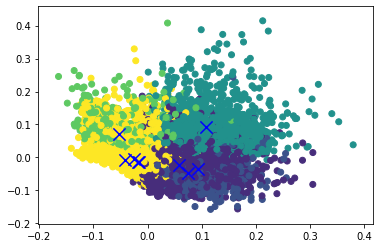

0.0035512539097596585
[3 2 6 5 4 0 1]
  (0, 25492)	0.4405908198786638
  (0, 15560)	0.36734705353238567
  (0, 9285)	0.49498994760553905
  (0, 8326)	0.37440207907067236
  (0, 7182)	0.3478460808920673
  (0, 1857)	0.40589039242728375
  (1, 24965)	0.4167975519064195
  (1, 22244)	0.30842853634730016
  (1, 21690)	0.28323482094569424
  (1, 15745)	0.2526002676062874
  (1, 9937)	0.4167975519064195
  (1, 7748)	0.28176103384046086
  (1, 6670)	0.4167975519064195
  (1, 2232)	0.40036620856330485
  (2, 20378)	0.5668650944975859
  (2, 15307)	0.390177892211653
  (2, 9978)	0.4805277940626627
  (2, 8744)	0.5436158719194888
  (3, 14513)	0.6703777138232324
  (3, 6475)	0.42153943313014464
  (3, 1784)	0.6106539340129175
  (4, 24692)	0.30930704995589287
  (4, 20812)	0.22370859683436614
  (4, 20191)	0.317133949539587
  (4, 16935)	0.2990565953429904
  :	:
  (21544, 8753)	0.4038827762218726
  (21544, 7316)	0.43435713594869985
  (21544, 4728)	0.22574520962980388
  (21545, 23075)	0.5773502691896257
  (21545, 8842)	

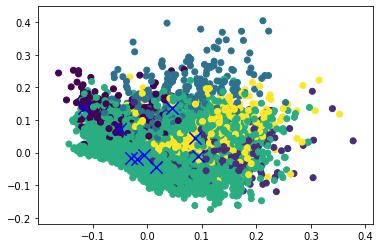

0.0018861322477112684
[0 1 4 5 3 6 7 2]
  (0, 6041)	1.0
  (1, 20075)	0.6349275077002673
  (1, 6041)	0.4401523826256699
  (1, 343)	0.6349275077002673
  (2, 26246)	0.7071067811865476
  (2, 20074)	0.7071067811865476
  (3, 26428)	0.22667422239976878
  (3, 26282)	0.22667422239976878
  (3, 26251)	0.22667422239976878
  (3, 26107)	0.22667422239976878
  (3, 25925)	0.2177434230703182
  (3, 25852)	0.22667422239976878
  (3, 23942)	0.2177434230703182
  (3, 18036)	0.19908078845128135
  (3, 15970)	0.22667422239976878
  (3, 14116)	0.2177434230703182
  (3, 13435)	0.22667422239976878
  (3, 10606)	0.22667422239976878
  (3, 10171)	0.22667422239976878
  (3, 9774)	0.2177434230703182
  (3, 9401)	0.22667422239976878
  (3, 7937)	0.22667422239976878
  (3, 7863)	0.22667422239976878
  (3, 5025)	0.22667422239976878
  (3, 667)	0.22667422239976878
  :	:
  (21678, 9861)	0.1631900039741275
  (21678, 9264)	0.1631900039741275
  (21678, 2150)	0.1312391544358655
  (21678, 746)	0.1631900039741275
  (21678, 724)	0.163190003

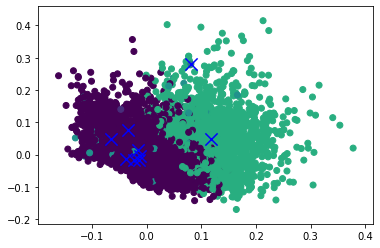

0.0017098643689606573
[2 7 0 5 8 1 6 3 4]
  (0, 25511)	0.5927421225512322
  (0, 23553)	0.2646082166110153
  (0, 20383)	0.27735449360093223
  (0, 16874)	0.2226807318502824
  (0, 12633)	0.29761460720929017
  (0, 12612)	0.21616619480992416
  (0, 11170)	0.27735449360093223
  (0, 10184)	0.25543523471946367
  (0, 7914)	0.3211459622208121
  (0, 6922)	0.2674273039293124
  (1, 24897)	0.3515875216419019
  (1, 21436)	0.41744008041342795
  (1, 20737)	0.22246660945623187
  (1, 18988)	0.5434874998782403
  (1, 15173)	0.30964742521135663
  (1, 10809)	0.258320354262612
  (1, 10195)	0.372222863910388
  (1, 8156)	0.2368525812805271
  (2, 22371)	0.21590619853263154
  (2, 21250)	0.2790945810531279
  (2, 16173)	0.3285159269332816
  (2, 13607)	0.31484279320721803
  (2, 12976)	0.24167953392876718
  (2, 8156)	0.1675403965785063
  (2, 7783)	0.3844421317799143
  :	:
  (22743, 14971)	0.244441200717
  (22743, 13446)	0.3662602194890284
  (22743, 13313)	0.4118033561959836
  (22743, 1681)	0.3033998075713151
  (22743,

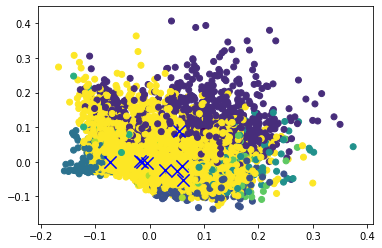

0.004849170774614978
[9 1 5 0 2 7 4 6 3 8]
  (0, 6179)	1.0
  (1, 6179)	1.0
  (2, 24318)	0.2762355643648263
  (2, 22931)	0.3029992075966645
  (2, 22201)	0.3317893710864307
  (2, 21017)	0.2193093521022313
  (2, 20992)	0.245418880617132
  (2, 19251)	0.362606054834125
  (2, 10251)	0.17901761479190295
  (2, 9149)	0.18196903582896234
  (2, 8350)	0.30826389369840945
  (2, 7861)	0.2704304925366793
  (2, 3507)	0.412613578266269
  (2, 2028)	0.280038846764054
  (3, 23446)	0.3887472884399352
  (3, 22391)	0.3208672415692765
  (3, 18576)	0.37748944185831546
  (3, 16874)	0.22249115982507275
  (3, 10258)	0.3503645516949419
  (3, 9981)	0.3887472884399352
  (3, 8350)	0.29043337183116086
  (3, 7861)	0.2547883206530542
  (3, 6347)	0.3616223982765618
  (4, 16107)	0.32735954175936594
  (4, 11569)	0.4794444084042931
  :	:
  (22750, 14971)	0.2444447750249419
  (22750, 13446)	0.3662592195353067
  (22750, 13313)	0.41180064611336425
  (22750, 1681)	0.3034011680041348
  (22750, 173)	0.4286086316432354
  (22751, 2

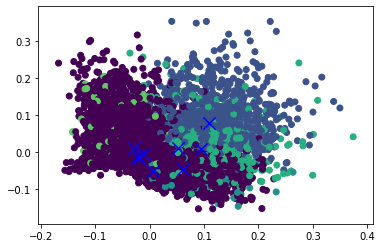

0.005277186498630709
[ 1  6  5  0  7  9  3  8  2  4 10]
  (0, 6591)	1.0
  (1, 24989)	0.37415223000098385
  (1, 19413)	0.4421314727926393
  (1, 18618)	0.38357734018074796
  (1, 18541)	0.30617298720932845
  (1, 16311)	0.322462552166264
  (1, 16179)	0.2896139611893887
  (1, 15721)	0.2702644156573118
  (1, 4566)	0.40342929630692953
  (2, 27585)	0.3182192169833416
  (2, 27511)	0.3058306656500852
  (2, 25595)	0.30253414335947826
  (2, 21914)	0.3221375449301054
  (2, 14612)	0.3777410062686469
  (2, 11942)	0.3221375449301054
  (2, 10899)	0.31747486345146214
  (2, 10894)	0.4713831734003867
  (2, 8017)	0.20112527782378917
  (3, 27286)	0.19964363713195332
  (3, 23812)	0.2486389589061443
  (3, 23278)	0.18938955997194415
  (3, 22402)	0.22224568407106018
  (3, 22293)	0.16921914030308188
  (3, 13912)	0.25325150067722135
  (3, 13485)	0.17916352693177962
  :	:
  (25862, 28933)	0.30598568856866915
  (25862, 28925)	0.30598568856866915
  (25862, 25944)	0.30598568856866915
  (25862, 21667)	0.29413331678187

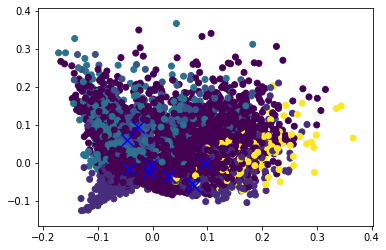

0.009009357206159281
[ 0  5  4  2  6  8  7 10  1  3 11  9]
  (0, 24974)	0.5900788271985044
  (0, 22704)	0.5510117561214782
  (0, 4197)	0.5900788271985044
  (1, 28554)	0.5073733822964542
  (1, 15319)	0.45449329462027016
  (1, 6811)	0.4411403881559404
  (1, 3507)	0.5842972308850134
  (2, 28554)	0.5073733822964542
  (2, 15319)	0.45449329462027016
  (2, 6811)	0.4411403881559404
  (2, 3507)	0.5842972308850134
  (3, 28554)	0.5073733822964542
  (3, 15319)	0.45449329462027016
  (3, 6811)	0.4411403881559404
  (3, 3507)	0.5842972308850134
  (4, 22603)	0.7934905846150307
  (4, 4940)	0.6085825269651576
  (5, 26259)	0.8867806757176349
  (5, 5583)	0.4621904728288704
  (6, 23108)	0.7259076872962563
  (6, 2654)	0.6877921412201514
  (7, 16310)	0.6907300949836795
  (7, 8026)	0.45548644576573494
  (7, 3864)	0.5616262401344289
  (8, 15851)	0.5605307223361862
  :	:
  (25906, 2838)	0.7172843362612004
  (25908, 10788)	0.639459107076006
  (25908, 9325)	0.639459107076006
  (25908, 6597)	0.4268302950296691
  (2

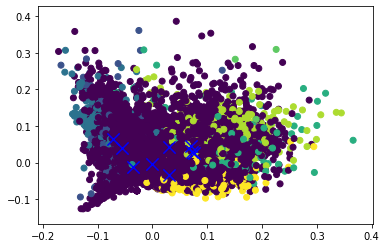

0.04658540911693542
[ 2  0  5  9  4  8  7  6 10  1  3 12 11]
  (0, 27786)	0.4640761177581137
  (0, 10984)	0.4619578664453881
  (0, 9129)	0.528119639171873
  (0, 2945)	0.5406643443734319
  (1, 27786)	0.4640761177581137
  (1, 10984)	0.4619578664453881
  (1, 9129)	0.528119639171873
  (1, 2945)	0.5406643443734319
  (2, 24993)	0.5207761222009782
  (2, 20826)	0.36725665467686935
  (2, 15475)	0.34419648943996023
  (2, 10987)	0.5207761222009782
  (2, 1951)	0.4519245372220741
  (3, 21630)	0.5699600389468314
  (3, 20966)	0.7398927993263055
  (3, 4966)	0.35735724353762577
  (4, 26614)	0.4081569851418382
  (4, 8076)	0.5426625528757614
  (4, 5765)	0.5828300604695055
  (4, 2998)	0.4463567517125728
  (5, 26430)	0.26714150001997267
  (5, 19460)	0.35200580227439177
  (5, 19256)	0.356857551434947
  (5, 15773)	0.47639930559684607
  (5, 11045)	0.22882219609169327
  :	:
  (26329, 6337)	0.4781324488402538
  (26329, 4988)	0.33083010718185424
  (26329, 3529)	0.4006745038325341
  (26330, 25707)	0.3564136915858

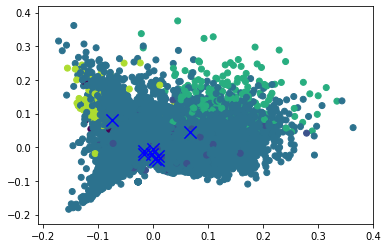

0.028234555235601987
[ 0  9  2 11  6  1 10  4  5  3  8 13  7 12]
  (0, 26847)	0.7753816583181115
  (0, 3522)	0.6314929009449398
  (1, 28923)	0.5313028271763003
  (1, 6851)	0.5061024357569206
  (1, 3080)	0.6793950473438722
  (2, 23153)	0.4343575591178305
  (2, 13675)	0.35183361279132175
  (2, 9877)	0.4665894749126404
  (2, 8662)	0.4665894749126404
  (2, 3520)	0.5021306040751746
  (3, 17497)	0.7032798590762337
  (3, 11586)	0.7109131028597749
  (4, 23204)	0.5083894974910164
  (4, 21968)	0.861127237312136
  (5, 20553)	0.4971635858542208
  (5, 5956)	0.40955282266885357
  (5, 3603)	0.5456925007858892
  (5, 3522)	0.5360173028276137
  (6, 20553)	0.4971635858542208
  (6, 5956)	0.40955282266885357
  (6, 3603)	0.5456925007858892
  (6, 3522)	0.5360173028276137
  (7, 17883)	0.8871930210923028
  (7, 5613)	0.46139846480576086
  (8, 19855)	0.7851454620240165
  :	:
  (26339, 18598)	0.34932184142363143
  (26339, 17740)	0.4500095849078319
  (26339, 8739)	0.3957618596380362
  (26339, 4320)	0.6341204947456

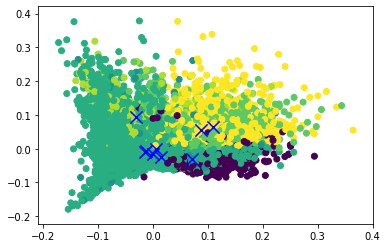

0.015263823810590944
[ 2  9 14  0  4  5 10 12  8  3  7 11 13  6  1]
  (0, 27790)	0.464081482407966
  (0, 10985)	0.4619635363852102
  (0, 9130)	0.5281157736399242
  (0, 2945)	0.5406586708536167
  (1, 27790)	0.464081482407966
  (1, 10985)	0.4619635363852102
  (1, 9130)	0.5281157736399242
  (1, 2945)	0.5406586708536167
  (2, 24996)	0.520768018710516
  (2, 20829)	0.3672670505948338
  (2, 15477)	0.3442096641547898
  (2, 10988)	0.520768018710516
  (2, 1951)	0.45192473048779463
  (3, 21633)	0.5699647411408115
  (3, 20969)	0.7398707240588481
  (3, 4966)	0.3573954470008304
  (4, 26618)	0.4081549978606245
  (4, 8077)	0.542704842296968
  (4, 5765)	0.5827985426549775
  (4, 2998)	0.44634830631251515
  (5, 26434)	0.26715689834600637
  (5, 19463)	0.352008056036696
  (5, 19259)	0.356859053713714
  (5, 15775)	0.4763822921491631
  (5, 11046)	0.22884352966398683
  :	:
  (26356, 18600)	0.3493312664594186
  (26356, 17742)	0.4500104852268508
  (26356, 8740)	0.39576735283477027
  (26356, 4320)	0.634105807334

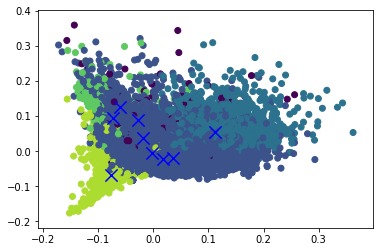

0.048063218541449224
[13  9  0  5 12  4  2 11 10  3 15 14  6  1  7  8]
  (1, 29400)	0.6434656090712035
  (1, 23815)	0.6434656090712035
  (1, 6705)	0.414613096615688
  (2, 19671)	1.0
  (3, 29303)	0.25568172817676466
  (3, 29251)	0.2659422699455634
  (3, 28834)	0.25568172817676466
  (3, 28367)	0.25568172817676466
  (3, 22352)	0.2659422699455634
  (3, 15785)	0.2659422699455634
  (3, 15377)	0.24840175793641878
  (3, 14936)	0.25568172817676466
  (3, 13309)	0.2659422699455634
  (3, 12759)	0.21332073391812945
  (3, 11887)	0.24840175793641878
  (3, 10182)	0.23814121616762005
  (3, 10035)	0.21034016238967662
  (3, 5143)	0.25568172817676466
  (3, 4358)	0.2659422699455634
  (3, 674)	0.22280258010318582
  (4, 812)	0.7208763909739503
  (4, 593)	0.6930636543178212
  (5, 29431)	0.16865877532878132
  (5, 29377)	0.16865877532878132
  (5, 29369)	0.16865877532878132
  :	:
  (26958, 7314)	0.5276810112649681
  (26958, 7283)	0.5315034352218085
  (26958, 6721)	0.6626136496464569
  (26959, 24105)	0.6867096045

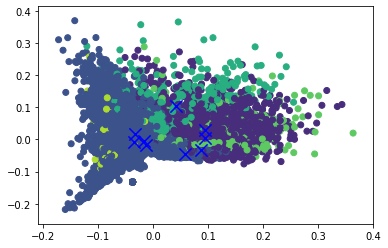

0.014574013107130858
[12 16  5  6 13  0 10 11  8  1 14 15  4  7  3  9  2]
  (0, 11888)	0.8044493984402492
  (0, 6705)	0.5940211825761107
  (2, 28149)	0.2717512567938644
  (2, 24741)	0.5028793726099823
  (2, 23161)	0.26607542568075854
  (2, 9912)	0.4419069557494001
  (2, 9626)	0.3588673098569822
  (2, 8531)	0.3394363007113605
  (2, 5994)	0.4039590982003578
  (3, 28491)	0.28075286389109605
  (3, 24204)	0.23710931038458244
  (3, 23238)	0.24633521232484673
  (3, 23161)	0.1664074997237123
  (3, 14656)	0.2294246544488955
  (3, 10647)	0.46500086762780435
  (3, 10125)	0.3218237828006812
  (3, 9912)	0.27637513471464004
  (3, 9747)	0.17420986823321288
  (3, 8530)	0.19473897688913047
  (3, 5994)	0.2526419843177134
  (3, 5111)	0.3034771879341166
  (3, 1239)	0.3218237828006812
  (4, 25634)	0.2406354424641594
  (4, 23161)	0.26966577541845815
  (4, 21643)	0.33616382961846486
  :	:
  (26971, 17934)	0.34826932340730943
  (26971, 16345)	0.1961624278283992
  (26971, 12785)	0.12765510670709324
  (26971, 1

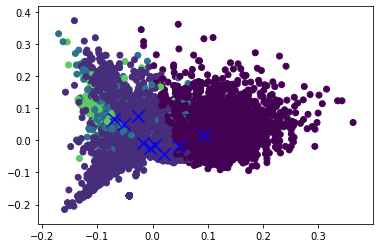

0.05474690001963191
[ 5 14  6 11  0 15 10  9 13 16  8  3  1  7  4 12 17  2]
  (0, 28418)	0.2117934986751664
  (0, 25362)	0.27557907918925145
  (0, 16236)	0.3352940227165318
  (0, 15718)	0.22626040878972153
  (0, 15458)	0.2809085020068781
  (0, 12071)	0.2953279029844775
  (0, 11648)	0.2953279029844775
  (0, 10196)	0.30606216799190067
  (0, 8165)	0.14225553116498366
  (0, 6271)	0.27557907918925145
  (0, 5626)	0.24053073295600455
  (0, 5495)	0.17061634029739364
  (0, 330)	0.2634724572347838
  (0, 308)	0.2602795567512305
  (0, 256)	0.2196689225819931
  (1, 28330)	0.3866695571568783
  (1, 27416)	0.49968311517752245
  (1, 26682)	0.14434998117113684
  (1, 26220)	0.29717095572843694
  (1, 25637)	0.10138427612012885
  (1, 24142)	0.2071897289863856
  (1, 22938)	0.20420111243739514
  (1, 21903)	0.19013198453073843
  (1, 11752)	0.13715249657922407
  (1, 9737)	0.3386553780893531
  :	:
  (26982, 16347)	0.19616500495948996
  (26982, 12787)	0.12766193054662464
  (26982, 11766)	0.3178999918165387
  (26

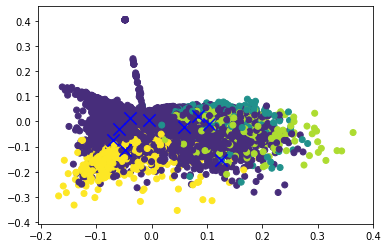

0.01045559007405779
[11  4 15  6  8  1 14  0  7 10 12  5  9 16 18  3  2 17 13]
  (0, 29456)	0.40904233497740405
  (0, 28182)	0.40904233497740405
  (0, 18278)	0.33062998423505074
  (0, 10957)	0.40904233497740405
  (0, 7165)	0.39326317739680394
  (0, 6708)	0.2583899371365549
  (0, 3177)	0.40904233497740405
  (1, 29423)	0.5427132451260158
  (1, 27723)	0.5217776179704665
  (1, 22710)	0.4711338630981443
  (1, 453)	0.45961215605342054
  (2, 29009)	0.27567186727807486
  (2, 25978)	0.3684469250576244
  (2, 22188)	0.3348274873849293
  (2, 19274)	0.26602098039046757
  (2, 13183)	0.31718069104949187
  (2, 12130)	0.2180655150790976
  (2, 8723)	0.22059493240098335
  (2, 8720)	0.40363399437939107
  (2, 8166)	0.17126903334699337
  (2, 6504)	0.23104784835031983
  (2, 3324)	0.40363399437939107
  (3, 22690)	0.3221580942064114
  (3, 21525)	0.2648162203049005
  (3, 20905)	0.3207644394529622
  :	:
  (27006, 6708)	0.11520757719655239
  (27006, 3558)	0.18237852799454277
  (27006, 2551)	0.18237852799454277
  

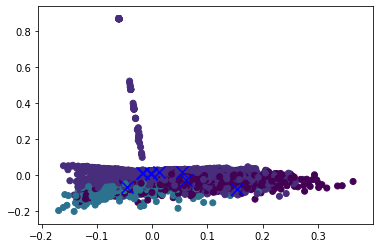

0.0036402174442186743
[ 1 16  6  7  9  0 12 14  8 15 10 11  3  4 13 17  2 19 18  5]
  (0, 25390)	0.5940963903519046
  (0, 23083)	0.54230891375827
  (0, 4275)	0.5940963903519046
  (1, 29025)	0.5047510989389052
  (1, 15578)	0.4558464221381484
  (1, 6929)	0.4402858343600572
  (1, 3573)	0.5861559106634383
  (2, 29025)	0.5047510989389052
  (2, 15578)	0.4558464221381484
  (2, 6929)	0.4402858343600572
  (2, 3573)	0.5861559106634383
  (3, 29025)	0.5047510989389052
  (3, 15578)	0.4558464221381484
  (3, 6929)	0.4402858343600572
  (3, 3573)	0.5861559106634383
  (4, 22980)	0.7934469520785936
  (4, 5029)	0.6086394123265348
  (5, 26698)	0.8872154063804918
  (5, 5681)	0.46135541904381994
  (6, 23493)	0.7265081704191894
  (6, 2703)	0.6871578263500767
  (7, 16591)	0.6920656246152728
  (7, 8167)	0.4532943113952379
  (7, 3935)	0.5617556750782224
  (8, 16120)	0.5618164214956722
  :	:
  (27025, 14971)	0.18239663767042713
  (27025, 14960)	0.18239663767042713
  (27025, 14654)	0.18239663767042713
  (27025, 14

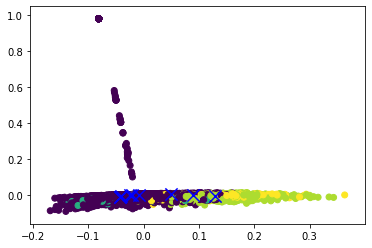

0.015974151274871243
[ 1  4  3 11  9  0 12 14  6 18 15  8  7 13 17 10 20  2  5 16 19]
  (0, 25390)	0.5940959793307816
  (0, 23083)	0.5423098142999064
  (0, 4275)	0.5940959793307816
  (1, 29025)	0.5047510464806023
  (1, 15578)	0.4558480915818011
  (1, 6929)	0.44028805168191465
  (1, 3573)	0.586152991994505
  (2, 29025)	0.5047510464806023
  (2, 15578)	0.4558480915818011
  (2, 6929)	0.44028805168191465
  (2, 3573)	0.586152991994505
  (3, 29025)	0.5047510464806023
  (3, 15578)	0.4558480915818011
  (3, 6929)	0.44028805168191465
  (3, 3573)	0.586152991994505
  (4, 22980)	0.793442708525126
  (4, 5029)	0.6086449443545162
  (5, 26698)	0.8872106111478215
  (5, 5681)	0.4613646404599177
  (6, 23493)	0.7265074787671307
  (6, 2703)	0.6871585576091062
  (7, 16591)	0.6920608503770044
  (7, 8167)	0.45330026281758845
  (7, 3935)	0.5617567543919371
  (8, 16120)	0.5618147009239699
  :	:
  (27032, 14971)	0.18240707819547183
  (27032, 14960)	0.18240707819547183
  (27032, 14654)	0.18240707819547183
  (27032,

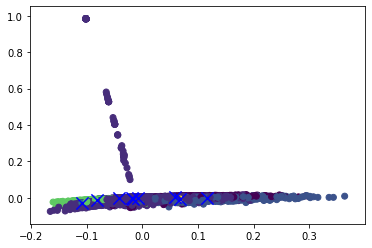

0.01502744333120523
[19  4  9 16  8 10 13  0  5 15 11 20  1 14 18 21  7  6  3 17 12  2]
  (1, 29869)	0.3608003909370052
  (1, 29866)	0.3608003909370052
  (1, 29173)	0.3608003909370052
  (1, 18206)	0.3232276606388272
  (1, 16014)	0.32946308941713454
  (1, 12241)	0.3093606838086854
  (1, 9015)	0.3469334141068635
  (1, 8453)	0.3608003909370052
  (1, 6789)	0.22406123537565187
  (3, 29048)	0.7619346722752953
  (3, 1516)	0.6476538853313074
  (4, 16018)	0.6773969733158766
  (4, 4016)	0.7356176592106048
  (5, 26411)	0.6565336127919771
  (5, 15315)	0.7542967687020238
  (6, 28148)	0.8244804161543305
  (6, 16695)	0.5658904870891382
  (8, 7846)	0.8495175897413813
  (8, 6789)	0.5275602948668467
  (9, 6789)	1.0
  (10, 28119)	0.36558734801629345
  (10, 21321)	0.36558734801629345
  (10, 19947)	0.36558734801629345
  (10, 14919)	0.38019992518008705
  (10, 6789)	0.23610857156874399
  :	:
  (28076, 15160)	0.182405028195335
  (28076, 14848)	0.182405028195335
  (28076, 14763)	0.182405028195335
  (28076, 129

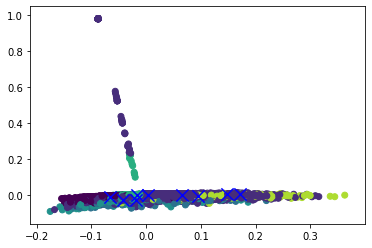

0.02169152596241685
[20  9  7 13  5 19 11  8  0  4 15  6 16 18  1 14 17 21 12  3 22  2 10]
  (0, 6789)	1.0
  (1, 27324)	0.48756852093370073
  (1, 10132)	0.6236941369062663
  (1, 8946)	0.3878709692433359
  (1, 6446)	0.47205791191495355
  (2, 28434)	0.3897021498817235
  (2, 23602)	0.3897021498817235
  (2, 19973)	0.34264986333217934
  (2, 19140)	0.28294584567171593
  (2, 14726)	0.28294584567171593
  (2, 13262)	0.324596461779077
  (2, 8660)	0.326247811000088
  (2, 5241)	0.3378852523310442
  (2, 4736)	0.30458479250143294
  (3, 26485)	0.49365032182700747
  (3, 20475)	0.47467778433658847
  (3, 11769)	0.4287827876960873
  (3, 6983)	0.49365032182700747
  (3, 5252)	0.32162873247435986
  (5, 28109)	0.6857968038591095
  (5, 21356)	0.5073366362554677
  (5, 16276)	0.38069369379638796
  (5, 12283)	0.35688176309988073
  (6, 20342)	0.476938296209654
  (6, 7476)	0.7537350537966241
  :	:
  (28082, 15160)	0.18241140879473927
  (28082, 14848)	0.18241140879473927
  (28082, 14763)	0.18241140879473927
  (2808

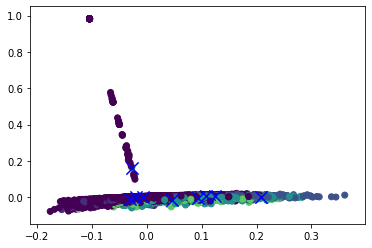

0.010088205869720228
[14 19 12 17 10 21  7 16 11  6  0 13  4 20 23  3  1 18  5  9  8 15  2 22]
  (0, 30157)	0.15608113234261847
  (0, 30128)	0.15608113234261847
  (0, 30087)	0.15608113234261847
  (0, 30086)	0.15608113234261847
  (0, 30083)	0.15608113234261847
  (0, 30070)	0.15608113234261847
  (0, 29939)	0.15608113234261847
  (0, 29897)	0.14583178885261683
  (0, 29863)	0.15008565074395702
  (0, 29833)	0.15008565074395702
  (0, 29792)	0.15608113234261847
  (0, 29707)	0.15608113234261847
  (0, 25422)	0.15608113234261847
  (0, 25365)	0.15608113234261847
  (0, 23048)	0.15608113234261847
  (0, 22910)	0.15608113234261847
  (0, 21529)	0.15008565074395702
  (0, 20156)	0.1338408256552939
  (0, 20064)	0.15608113234261847
  (0, 19285)	0.15608113234261847
  (0, 18270)	0.15608113234261847
  (0, 16248)	0.15008565074395702
  (0, 15552)	0.15008565074395702
  (0, 15298)	0.14583178885261683
  (0, 15073)	0.15608113234261847
  :	:
  (28237, 22511)	0.3890220600104094
  (28237, 20597)	0.24521552164776841
  

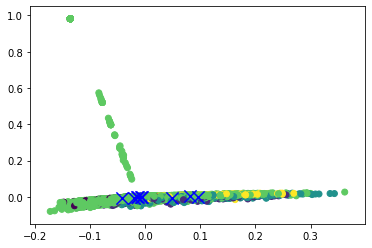

0.007471433006582134
[22 11 21 18 14 19 15 10  0  7 13 17  4 12  3 16  1  9  5  6 20  8  2 24
 23]
  (0, 26183)	0.36957296773943665
  (0, 22208)	0.4501361688597292
  (0, 21987)	0.43287806600189777
  (0, 18718)	0.23767697024329942
  (0, 13924)	0.39933939012626873
  (0, 8396)	0.4101364321559547
  (0, 8092)	0.2987233624993813
  (2, 6866)	1.0
  (5, 29247)	0.41254237721029446
  (5, 23977)	0.552041438622743
  (5, 21566)	0.3968963064699628
  (5, 13098)	0.21108615038781467
  (5, 11466)	0.4233014611810811
  (5, 9398)	0.37919766486085754
  (6, 29095)	0.3775074121086876
  (6, 27355)	0.20067854276271993
  (6, 23640)	0.3975126848927256
  (6, 19743)	0.27197873599183847
  (6, 17430)	0.3177430400512579
  (6, 13644)	0.2815196164665744
  (6, 9684)	0.4133917632214767
  (6, 5198)	0.3975126848927256
  (6, 2193)	0.27587042300472114
  (7, 24004)	0.4045202250033271
  (7, 23786)	0.42881750703665
  :	:
  (28244, 13383)	0.22073193539602076
  (28244, 10314)	0.196226553981462
  (28244, 3440)	0.2090830422328583
  (

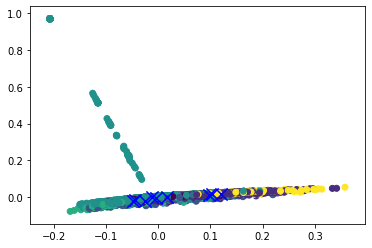

0.015930526404469732
[ 6  5 12 22 10  8 17 18  7 11 16 19  4 15 25 20 14  0 13  2  1  3 21 23
  9 24]
  (0, 30024)	0.2710184815377282
  (0, 29063)	0.29474201496144437
  (0, 22395)	0.3098834028168691
  (0, 18428)	0.32342260374683146
  (0, 17862)	0.27752240337487044
  (0, 14149)	0.31185412494634185
  (0, 9660)	0.30282337223822614
  (0, 9412)	0.3276341012221786
  (0, 2064)	0.1920903610793513
  (0, 285)	0.29750152685325276
  (0, 275)	0.3745965554402348
  (1, 29272)	0.3995008244479998
  (1, 15504)	0.6258038017866563
  (1, 9681)	0.4338242826950378
  (1, 4733)	0.5104558596772808
  (2, 29413)	0.2392753919611564
  (2, 26110)	0.4647324872190394
  (2, 17062)	0.284866810400852
  (2, 15843)	0.4265267504482601
  (2, 12633)	0.5566994375228691
  (2, 12629)	0.3007191851748561
  (2, 5647)	0.2516953347573704
  (3, 29609)	0.30194364131497753
  (3, 28474)	0.2661139005625214
  (3, 27684)	0.17715651355422987
  :	:
  (28288, 14917)	0.3716870561342078
  (28288, 14541)	0.43164366717774394
  (28288, 6576)	0.2939

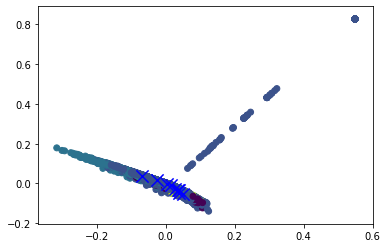

0.03897616540437955
[16  8 17 11 19 12 22  6 14 15 23 18  7 20 10  4 24 26  0  5 21  3 13  2
  1  9 25]
  (0, 24471)	0.20874783461742097
  (0, 22203)	0.269741137052579
  (0, 16998)	0.3311056686462023
  (0, 14893)	0.2717885078160812
  (0, 12744)	0.1797365970621869
  (0, 12569)	0.36933217384868444
  (0, 11695)	0.36933217384868444
  (0, 5972)	0.36933217384868444
  (0, 4952)	0.17679642282896935
  (0, 1568)	0.3016237154565014
  (0, 1414)	0.36933217384868444
  (1, 30084)	0.34240116212447946
  (1, 28454)	0.24916337975792316
  (1, 26119)	0.34240116212447946
  (1, 24065)	0.27740430183970444
  (1, 16453)	0.34240116212447946
  (1, 14893)	0.25197019788054364
  (1, 12161)	0.30696206222453454
  (1, 7041)	0.320041579557813
  (1, 6756)	0.329321644791201
  (1, 4761)	0.15302350660182124
  (1, 2170)	0.34240116212447946
  (2, 29962)	0.3332569075376381
  (2, 26917)	0.3332569075376381
  (2, 26409)	0.27448874551847413
  :	:
  (29953, 7494)	0.34817479045604344
  (29953, 597)	0.34817479045604344
  (29953, 355)

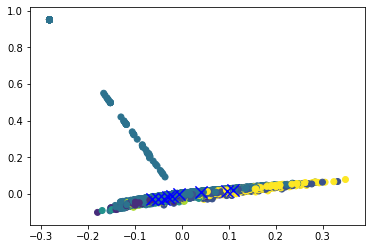

0.011689620274452583
[14 10 24  0 18  5 17 16 22  3 20  6 12 13 15  4  7 19 27  2 21  8  1  9
 23 11 26 25]
  (0, 21702)	0.42819491842442053
  (0, 19384)	0.2888924031768197
  (0, 11536)	0.34329079416142155
  (0, 8874)	0.7844372007154212
  (1, 27195)	0.3315681895229305
  (1, 21735)	0.4506968093196281
  (1, 17131)	0.5994705382338592
  (1, 6369)	0.42167781938422677
  (1, 2694)	0.3869855452010622
  (2, 23109)	0.34626547691442544
  (2, 21735)	0.3293056020158363
  (2, 19842)	0.2588655950140166
  (2, 17310)	0.278997323807021
  (2, 3050)	0.37969384225727376
  (2, 2390)	0.27416920785981086
  (2, 1602)	0.32400495038532034
  (2, 1285)	0.2879508789036904
  (2, 114)	0.46858942805253645
  (3, 23882)	0.19779406186935622
  (3, 14489)	0.18831604349971187
  (3, 13915)	0.5333951778222261
  (3, 10847)	0.27442573738349757
  (3, 10802)	0.2005098577981916
  (3, 9367)	0.236475638449985
  (3, 9362)	0.12254867135806105
  :	:
  (30153, 27830)	0.33932221298116283
  (30153, 14104)	0.3263683487726634
  (30153, 1332

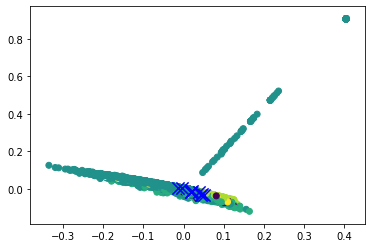

0.03453639406297858
[21 26 20 12 18 17  9 22  5 19 24 13 10  1  0 16  6  4 23  8 15  7 14 11
  2  3 28 27 25]
  (0, 30935)	0.3340013871151469
  (0, 19670)	0.2667119668373065
  (0, 9061)	0.3044045382435047
  (0, 8298)	0.40675097650248543
  (0, 7662)	0.4364378660978358
  (0, 5676)	0.24162370313347858
  (0, 2442)	0.5019074822546351
  (0, 1316)	0.2417192063920699
  (1, 22281)	0.7116271334132848
  (1, 1496)	0.7025573449833051
  (2, 7058)	1.0
  (3, 24420)	0.7993544540376768
  (3, 24418)	0.6008597646790205
  (4, 27744)	0.34861782824845394
  (4, 23249)	0.35392473250625256
  (4, 22616)	0.2831310350383836
  (4, 14499)	0.29747948048442524
  (4, 14216)	0.33381654874327965
  (4, 11321)	0.42934843519203475
  (4, 8191)	0.35994120433617044
  (4, 3585)	0.2640886289206483
  (4, 1299)	0.29911808323074573
  (5, 30804)	0.44358191695147586
  (5, 30372)	0.47294396239238246
  (5, 27282)	0.5568603092147182
  :	:
  (30355, 27959)	0.3393184760653875
  (30355, 14163)	0.3263728915850974
  (30355, 13382)	0.32637289

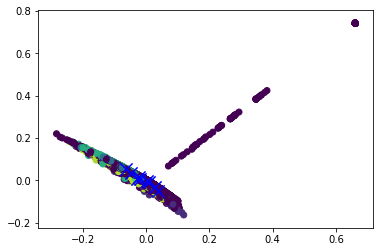

0.015103253009784476
[27  1 12  8 25 23  7 19  6 16  5 14 18  2 22 10  9 21 13  0 29 20  4 24
 17 15 11 26  3 28]
  (1, 7134)	1.0
  (2, 7134)	1.0
  (4, 7134)	1.0
  (5, 27906)	0.40619146635475006
  (5, 24557)	0.3318202601657812
  (5, 21456)	0.2530342392692616
  (5, 14352)	0.3291834050810713
  (5, 4230)	0.37117153134781417
  (5, 3790)	0.3346526105083531
  (5, 2929)	0.37117153134781417
  (5, 1828)	0.302691846922668
  (5, 1066)	0.27085869360438547
  (6, 29193)	0.2644588438561492
  (6, 16857)	0.5090483245568744
  (6, 16335)	0.6417173259605407
  (6, 8214)	0.5090483245568744
  (8, 30596)	0.5475773214598686
  (8, 30350)	0.23299645818173925
  (8, 28440)	0.31279314759413884
  (8, 24229)	0.3090559187598342
  (8, 15794)	0.49112141937035386
  (8, 10939)	0.34069497321238296
  (8, 10366)	0.19420302385181015
  (8, 6426)	0.23985096536295758
  (9, 16083)	0.41999873942954646
  :	:
  (30360, 8013)	0.2029078798085961
  (30360, 7746)	0.29411663930722387
  (30360, 6062)	0.1307297961153211
  (30360, 5538)	0.1

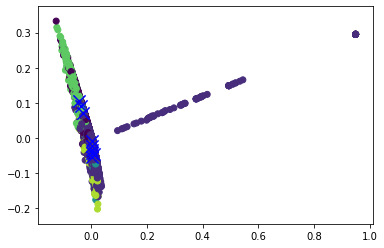

0.01885693789606145
csv_data/pubmed21n0195/
[0]
  (0, 955)	0.2972870353277646
  (0, 894)	0.2730119428217769
  (0, 864)	0.3387855800653518
  (0, 850)	0.198009343732071
  (0, 740)	0.3387855800653518
  (0, 563)	0.22228443623805877
  (0, 539)	0.31451048755936406
  (0, 529)	0.3387855800653518
  (0, 478)	0.3387855800653518
  (0, 224)	0.13036462468777263
  (0, 160)	0.2730119428217769
  (0, 100)	0.31451048755936406
  (1, 825)	0.37295202286255735
  (1, 750)	0.35252815273886495
  (1, 524)	0.40173785104126
  (1, 491)	0.40173785104126
  (1, 320)	0.336686168314393
  (1, 230)	0.40173785104126
  (1, 79)	0.37295202286255735
  (2, 951)	0.4971771793385789
  (2, 563)	0.3262085387411882
  (2, 354)	0.3397522947003339
  (2, 258)	0.4971771793385789
  (2, 224)	0.19131368098753365
  (2, 221)	0.4971771793385789
  :	:
  (206, 563)	0.18596950776062737
  (206, 435)	0.2834376919384372
  (206, 354)	0.1936907208186054
  (206, 293)	0.24871882421993294
  (206, 281)	0.2834376919384372
  (206, 224)	0.10906676820422868
  

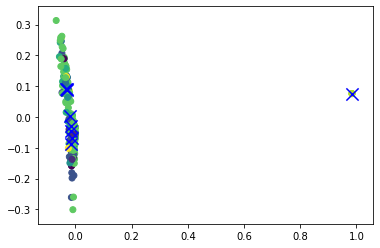

1.0
[1 0]
  (0, 15675)	0.47279518966844164
  (0, 12247)	0.47279518966844164
  (0, 8891)	0.47279518966844164
  (0, 5529)	0.36668518483892026
  (0, 5)	0.44151568612994224
  (1, 24755)	0.24978627747643922
  (1, 24608)	0.2401194625432134
  (1, 24580)	0.24978627747643922
  (1, 24505)	0.24978627747643922
  (1, 24450)	0.2332607481966848
  (1, 23630)	0.24978627747643922
  (1, 19970)	0.24978627747643922
  (1, 15686)	0.2401194625432134
  (1, 12095)	0.24978627747643922
  (1, 10497)	0.21991878079306804
  (1, 9319)	0.24978627747643922
  (1, 7132)	0.24978627747643922
  (1, 5974)	0.22794071603864816
  (1, 3225)	0.2401194625432134
  (1, 2696)	0.24978627747643922
  (1, 1073)	0.21991878079306804
  (1, 336)	0.24978627747643922
  (2, 24733)	0.2564027683135565
  (2, 24701)	0.2564027683135565
  (2, 24263)	0.2464798929070494
  :	:
  (26107, 20103)	0.23063233082348106
  (26107, 16736)	0.31732043166259577
  (26107, 12228)	0.31732043166259577
  (26107, 7875)	0.31732043166259577
  (26107, 6108)	0.305040021712121

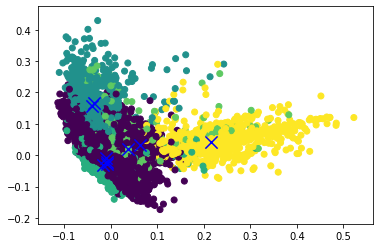

0.018650180442685592
[2 0 1]
  (0, 24786)	0.25838355401887964
  (0, 24653)	0.25838355401887964
  (0, 24588)	0.25838355401887964
  (0, 24578)	0.24838672164987013
  (0, 24457)	0.25838355401887964
  (0, 24445)	0.24838672164987013
  (0, 24334)	0.25838355401887964
  (0, 22148)	0.25838355401887964
  (0, 15000)	0.25838355401887964
  (0, 14999)	0.25838355401887964
  (0, 14997)	0.25838355401887964
  (0, 14232)	0.23129702383730066
  (0, 12450)	0.22420415839374067
  (0, 12273)	0.25838355401887964
  (0, 5544)	0.19611115286316877
  (0, 519)	0.25838355401887964
  (1, 19019)	0.7209153091330893
  (1, 8681)	0.6930231720927824
  (2, 24782)	0.5232492523128842
  (2, 24775)	0.5232492523128842
  (2, 12386)	0.5232492523128842
  (2, 443)	0.4226472049618014
  (3, 24823)	0.2601807646012166
  (3, 24537)	0.2601807646012166
  (3, 24118)	0.2601807646012166
  :	:
  (26179, 907)	0.30655652098526526
  (26180, 22085)	0.33425006569575527
  (26180, 21634)	0.23403102857816593
  (26180, 18704)	0.4820043371318626
  (26180, 

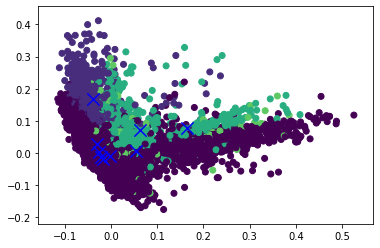

0.0029029814500357754
[3 1 0 2]
  (0, 26796)	0.21126400478756746
  (0, 26776)	0.21126400478756746
  (0, 26660)	0.21126400478756746
  (0, 26585)	0.21126400478756746
  (0, 26488)	0.21126400478756746
  (0, 26435)	0.20319774388414333
  (0, 25374)	0.21126400478756746
  (0, 23005)	0.21126400478756746
  (0, 19205)	0.21126400478756746
  (0, 17528)	0.21126400478756746
  (0, 16974)	0.21126400478756746
  (0, 13631)	0.20319774388414333
  (0, 13343)	0.21126400478756746
  (0, 13006)	0.21126400478756746
  (0, 11446)	0.21126400478756746
  (0, 10036)	0.21126400478756746
  (0, 10032)	0.21126400478756746
  (0, 6439)	0.21126400478756746
  (0, 5956)	0.15739046789167904
  (0, 575)	0.21126400478756746
  (0, 444)	0.21126400478756746
  (0, 307)	0.21126400478756746
  (0, 16)	0.21126400478756746
  (1, 26538)	0.6561328389096481
  (1, 10762)	0.7546454119017525
  :	:
  (30108, 14414)	0.2723552814932351
  (30108, 6517)	0.36728523184160305
  (30108, 5660)	0.37259690416674557
  (30108, 3487)	0.3948575549026199
  (3010

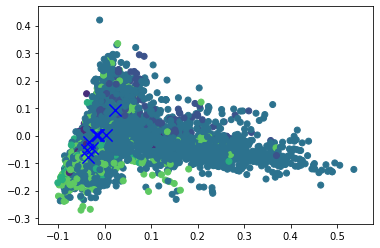

0.02381318808308538
[4 1 0 3 2]
  (0, 5956)	1.0
  (1, 26734)	0.368082594146701
  (1, 26597)	0.368082594146701
  (1, 13591)	0.368082594146701
  (1, 9933)	0.368082594146701
  (1, 6434)	0.33632471593570884
  (1, 5956)	0.2719869643350108
  (1, 401)	0.368082594146701
  (1, 15)	0.368082594146701
  (2, 7582)	0.7071067811865476
  (2, 3466)	0.7071067811865476
  (3, 26796)	0.3072218997344139
  (3, 26703)	0.3072218997344139
  (3, 26579)	0.2954924250633132
  (3, 26502)	0.3072218997344139
  (3, 26440)	0.3072218997344139
  (3, 24640)	0.2807150346159112
  (3, 13595)	0.2807150346159112
  (3, 8709)	0.3072218997344139
  (3, 2893)	0.3072218997344139
  (3, 598)	0.3072218997344139
  (3, 594)	0.3072218997344139
  (5, 26539)	0.3467145312631564
  (5, 26513)	0.3987678601632683
  (5, 26325)	0.3987678601632683
  :	:
  (30121, 6441)	0.23958947223524232
  (30121, 6179)	0.25631881385711774
  (30121, 2902)	0.20613078899149148
  (30121, 513)	0.246532776346567
  (30121, 224)	0.25631881385711774
  (30122, 26781)	0.4126

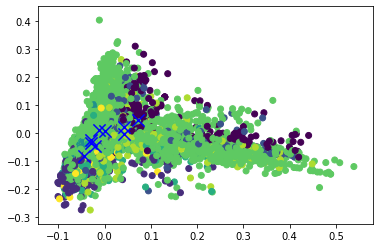

0.023596290255861102
[5 3 4 1 0 2]
  (0, 26735)	0.12236632529453574
  (0, 26733)	0.12236632529453574
  (0, 26722)	0.12236632529453574
  (0, 26713)	0.12236632529453574
  (0, 26704)	0.12236632529453574
  (0, 26672)	0.12236632529453574
  (0, 26628)	0.12236632529453574
  (0, 26605)	0.1176945837361272
  (0, 26540)	0.12236632529453574
  (0, 26521)	0.1176945837361272
  (0, 26437)	0.11437993035016049
  (0, 26326)	0.12236632529453574
  (0, 25737)	0.12236632529453574
  (0, 24785)	0.10382249049632446
  (0, 24634)	0.12236632529453574
  (0, 23927)	0.1176945837361272
  (0, 22554)	0.12236632529453574
  (0, 21685)	0.12236632529453574
  (0, 21614)	0.11180888544069971
  (0, 19579)	0.12236632529453574
  (0, 19156)	0.1176945837361272
  (0, 17730)	0.12236632529453574
  (0, 16951)	0.12236632529453574
  (0, 16685)	0.12236632529453574
  (0, 16682)	0.12236632529453574
  :	:
  (30132, 20489)	0.23464120560364887
  (30132, 14232)	0.23464120560364887
  (30132, 13357)	0.23464120560364887
  (30132, 13225)	0.23464120

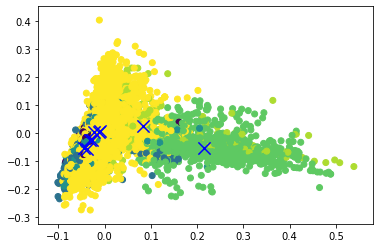

0.011430758927156517
[6 3 4 1 5 0 2]
  (0, 26258)	0.2425671108235571
  (0, 25903)	0.2521947007289959
  (0, 24070)	0.2521947007289959
  (0, 23777)	0.2521947007289959
  (0, 22647)	0.2521947007289959
  (0, 22322)	0.2521947007289959
  (0, 21702)	0.2521947007289959
  (0, 20511)	0.2521947007289959
  (0, 19029)	0.2521947007289959
  (0, 15670)	0.2304377820096535
  (0, 12168)	0.2425671108235571
  (0, 10578)	0.2357362270771471
  (0, 5961)	0.1816635212222771
  (0, 4380)	0.2425671108235571
  (0, 3871)	0.2521947007289959
  (0, 521)	0.2139793083578047
  (0, 483)	0.2521947007289959
  (1, 26810)	0.28348012606852313
  (1, 26805)	0.28348012606852313
  (1, 26510)	0.28348012606852313
  (1, 24291)	0.24052401233644025
  (1, 14879)	0.28348012606852313
  (1, 13620)	0.2726582079543015
  (1, 13584)	0.2649799348581805
  (1, 13428)	0.28348012606852313
  :	:
  (30155, 41)	0.1963798829885146
  (30156, 10041)	1.0
  (30157, 26776)	0.3779644730092272
  (30157, 16217)	0.3779644730092272
  (30157, 12118)	0.3779644730092

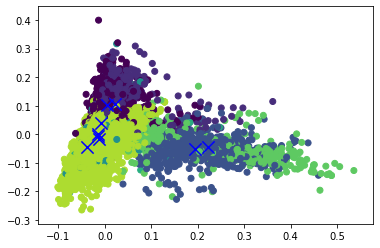

0.0888751573483476
csv_data/pubmed21n0144/
[0]
  (0, 16)	0.5
  (0, 15)	0.5
  (0, 11)	0.5
  (0, 3)	0.5
  (1, 19)	0.3600623796425964
  (1, 14)	0.3600623796425964
  (1, 13)	0.3600623796425964
  (1, 10)	0.3600623796425964
  (1, 5)	0.3600623796425964
  (1, 4)	0.3600623796425964
  (1, 1)	0.30411441820929086
  (1, 0)	0.3600623796425964
  (3, 7)	1.0
  (4, 7)	1.0
  (6, 7)	1.0
  (7, 18)	0.3600623796425964
  (7, 17)	0.3600623796425964
  (7, 12)	0.3600623796425964
  (7, 9)	0.3600623796425964
  (7, 8)	0.3600623796425964
  (7, 6)	0.3600623796425964
  (7, 2)	0.3600623796425964
  (7, 1)	0.30411441820929086


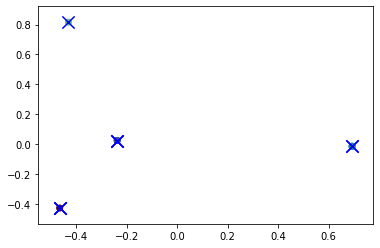

1.0
[0 1]
  (0, 409)	1.0
  (1, 409)	1.0
  (2, 1695)	0.46714262695867537
  (2, 1096)	0.46714262695867537
  (2, 532)	0.46714262695867537
  (2, 409)	0.3565263865586832
  (2, 21)	0.46714262695867537
  (3, 1514)	0.5376895011893741
  (3, 859)	0.5376895011893741
  (3, 409)	0.4103682342107192
  (3, 23)	0.5033665791172677
  (4, 1669)	0.1982920384926689
  (4, 1555)	0.3051022205427188
  (4, 999)	0.3051022205427188
  (4, 853)	0.3424748210716045
  (4, 733)	0.32061325120777473
  (4, 648)	0.3051022205427188
  (4, 555)	0.27492926755563035
  (4, 459)	0.27492926755563035
  (4, 304)	0.3424748210716045
  (4, 153)	0.27492926755563035
  (4, 146)	0.3424748210716045
  (5, 1513)	0.27139544506272056
  (5, 1469)	0.24808118599508427
  (5, 1464)	0.27139544506272056
  :	:
  (416, 1554)	0.35986253652355094
  (416, 1317)	0.2899969066750582
  (416, 1018)	0.3456718480340774
  (416, 656)	0.3456718480340774
  (416, 648)	0.35986253652355094
  (416, 511)	0.32427408562003085
  (416, 183)	0.26784653859115737
  (416, 153)	0.3

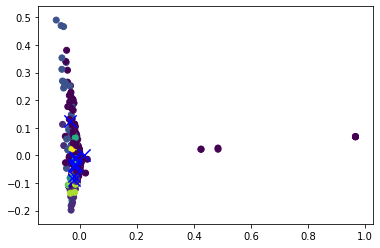

0.08399585063267932
[2 1 0]
  (0, 22074)	0.6232460873595581
  (0, 13653)	0.6232460873595581
  (0, 4998)	0.47236493221026077
  (1, 22463)	0.45060929414128326
  (1, 11134)	0.45060929414128326
  (1, 556)	0.43336480721671194
  (1, 293)	0.45060929414128326
  (1, 235)	0.45060929414128326
  (2, 22465)	0.20262832565271904
  (2, 22412)	0.20262832565271904
  (2, 22409)	0.20262832565271904
  (2, 22346)	0.20262832565271904
  (2, 22297)	0.20262832565271904
  (2, 20269)	0.20262832565271904
  (2, 18292)	0.20262832565271904
  (2, 18217)	0.19487388836592281
  (2, 14526)	0.1816175902660679
  (2, 13099)	0.1786694900336834
  (2, 11941)	0.19487388836592281
  (2, 10159)	0.20262832565271904
  (2, 9475)	0.20262832565271904
  (2, 8346)	0.20262832565271904
  (2, 6696)	0.20262832565271904
  (2, 6364)	0.20262832565271904
  (2, 5565)	0.20262832565271904
  :	:
  (29379, 6143)	0.2467379213930001
  (29379, 5556)	0.18161111566399146
  (29379, 3584)	0.29535834497121055
  (29379, 2713)	0.2206252648568394
  (29379, 2613)

KeyboardInterrupt: 

In [7]:
counter = 0
for file in files:
    filepath = file.split('.')[0] + '/'
    print(filepath)
    df = spark.read.format("com.databricks.spark.csv").option("header", "true").option("delimiter", ",").option("inferSchema", "true").load(file)
    df = df.na.drop(subset=["pub_types", "article_title"])
    categories = [i.pub_types for i in df.select('pub_types').distinct().collect()]
    for cat in categories:
        counter+=1
        path = filepath + cat
        df_temp = df.filter(df.pub_types == cat)
        df_temp.select('article_title').write.option('maxRecordsPerFile', 2000).csv(path)
        data = load_files(filepath, encoding="utf-8", decode_error="replace", random_state=random_state)
        df_new = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])
        df_new = df_new.drop('text', axis=1).join(df_new['text'].str.split('\n', expand=True).stack().reset_index(drop=True, level=1).rename('text'))
        print(df_new.label.unique())
        vec = TfidfVectorizer(stop_words="english")
        vec.fit(df_new.text.values)
        features = vec.transform(df_new.text.values)
        print(features)
        cls = MiniBatchKMeans(n_clusters=9, random_state=random_state)
        cls.fit(features)
        # predict cluster labels for new dataset
        cls.predict(features)
        # reduce the features to 2D
        pca = PCA(n_components=2, random_state=random_state)
        reduced_features = pca.fit_transform(features.toarray())
        # reduce the cluster centers to 2D
        reduced_cluster_centers = pca.transform(cls.cluster_centers_)
        plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cls.predict(features))
        plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:, 1], marker='x', s=150, c='b')
        plt.show()
        # score for homogeneity, if score is near 0, we have overlapping clusters.
        print(homogeneity_score(df_new.label, cls.predict(features)))